In [198]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas 
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
import plotly_express as px
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler

In [199]:
data=pd.read_csv('insurance1.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


## Nots
> - smoker,region is object so it must convert to numeric data

In [201]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

> - no missing value 

In [202]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [203]:
data.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

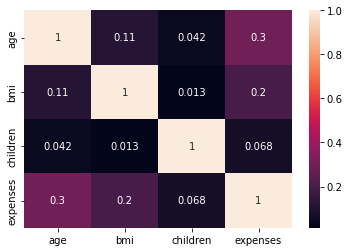

In [204]:
sas.heatmap(data.corr(),annot=True)

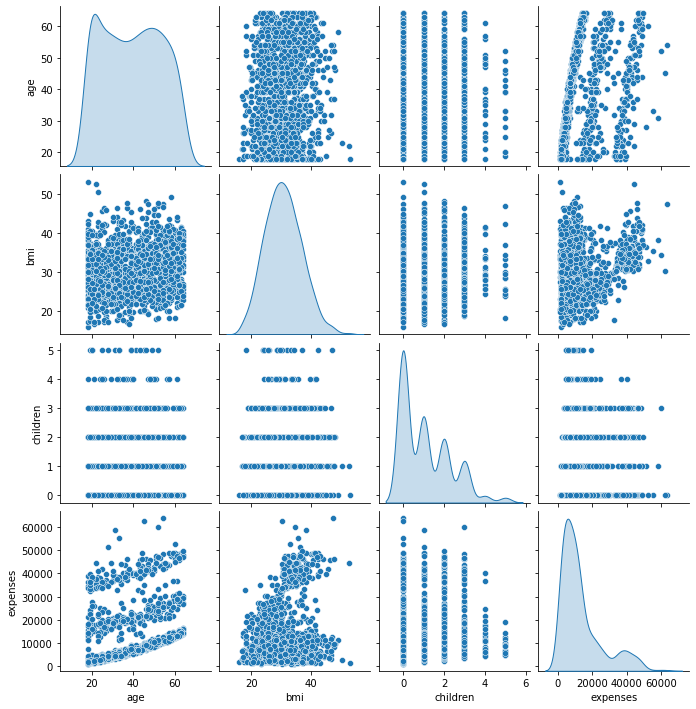

In [205]:
sas.pairplot(data,diag_kind='kde')

## info about Age

c:\Users\abrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

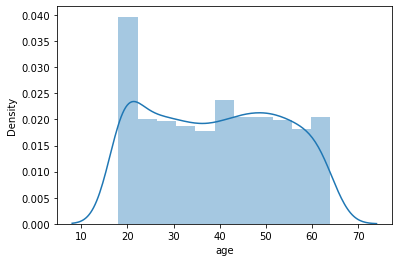

In [206]:
sas.distplot(data['age'])

> - We find that the age distribution here starts from 20 to 60

In [217]:
px.box(data['age'])


> - age not have outliers point

c:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age', ylabel='expenses'>

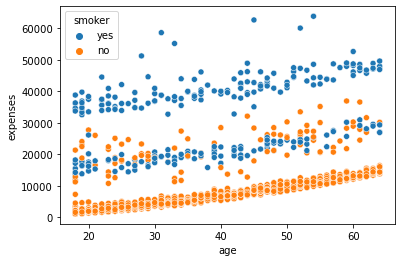

In [208]:
sas.scatterplot(data['age'],data['expenses'],hue=data['smoker'])

In [209]:
data.head(1)

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0.0,yes,southwest,16884.92


## info about Sex columns

In [210]:
count_s=data['sex'].value_counts()
count_s

male      676
female    662
Name: sex, dtype: int64

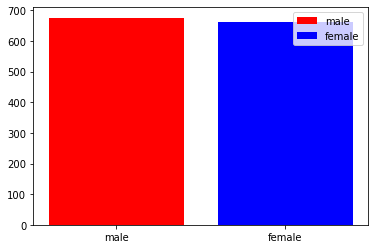

In [211]:
fig,ax=plt.subplots()
ax.bar(count_s.index[0],count_s.values[0],label='male',color='r')
ax.bar(count_s.index[1],count_s.values[1],label='female',color='b')
plt.legend()
plt.show()

> There is not much difference between the numbers

c:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



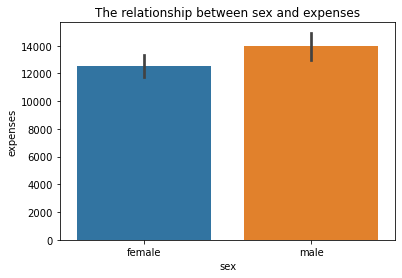

In [212]:
sas.barplot(data['sex'],data['expenses'])
plt.title('The relationship between sex and expenses')
plt.show()

> - We find from the drawing that men are more than women in the tunnels, but this is not a big difference

## info about bmi

c:\Users\abrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='bmi', ylabel='Density'>

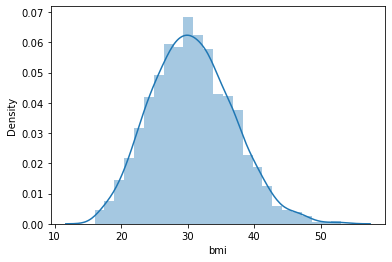

In [213]:
sas.distplot(data['bmi'])

In [214]:
px.box(data['bmi'])

In [215]:
data[data['bmi']>47].value_counts().sum()

9

> - we find that we have 9 point outliers 

In [216]:
px.scatter(data,x='bmi',y='expenses',title='The relationship between bmi and expenses and region')


In [218]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


## info about children

In [220]:
count_ch=data['children'].value_counts()
count_ch

0.0    574
1.0    324
2.0    240
3.0    157
4.0     25
5.0     18
Name: children, dtype: int64

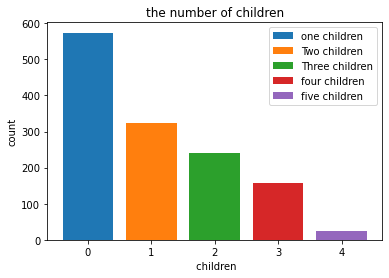

In [229]:
fig,ax=plt.subplots()
ax.bar(count_ch.index[0],count_ch.values[0],label='one children')
ax.bar(count_ch.index[1],count_ch.values[1],label='Two children')
ax.bar(count_ch.index[2],count_ch.values[2],label='Three children')
ax.bar(count_ch.index[3],count_ch.values[3],label='four children')
ax.bar(count_ch.index[4],count_ch.values[4],label='five children')
plt.xlabel(' children')
plt.ylabel('count')
plt.title('the number of children')
plt.legend()
plt.show()

> Those who do not have children are considered the largest proportion in the data

c:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='children', ylabel='count'>

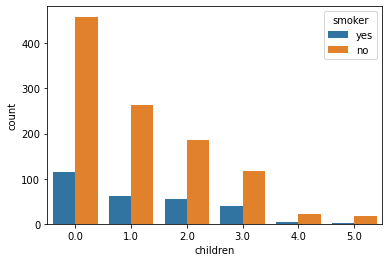

In [230]:
sas.countplot(data['children'],hue=data['smoker'])

> - From the previous figure, we see that the percentage of smokers is very low

In [232]:
count_sm=data['smoker'].value_counts()
count_sm

no     1064
yes     274
Name: smoker, dtype: int64

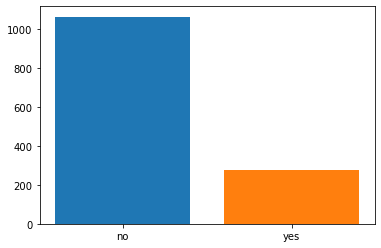

In [233]:
fig,ax=plt.subplots()
ax.bar(count_sm.index[0],count_sm.values[0],label='NO')
ax.bar(count_sm.index[1],count_sm.values[1],label='Yes')
plt.show()

> - From this figure, it is clear to us from what we previously said that the percentage of smokers is small

In [235]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\Users\abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='region', ylabel='count'>

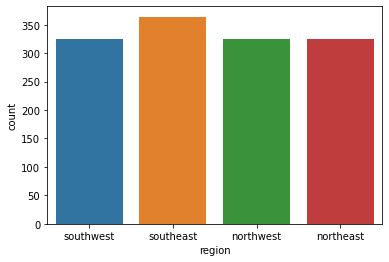

In [236]:
sas.countplot(data['region'])

> - From the previous figure, we find that the largest proportion is found in southeast

## info about expenses

c:\Users\abrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='expenses', ylabel='Density'>

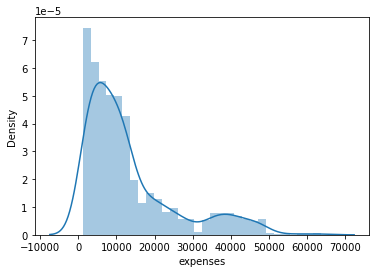

In [237]:
sas.distplot(data['expenses'])

> - From the previous figure, we find that the data is A left-skewed distribution

In [238]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


### From the previous figures, we find that there are some columns that need to be repaired

> - bmi have outliers points 
> - sex must change into numeric data
> - smoker must change into numeric data
> - region must change into numeric data
> - expenses change to  the normal distribution

#### label encod Object types

In [239]:
type_d=dict(data.dtypes)
for name ,type in type_d.items():
    if str(type)== 'object':
        print(f'======={name}=======')
        print(data[name].value_counts())
        print()

=======sex=======
male      676
female    662
Name: sex, dtype: int64

=======smoker=======
no     1064
yes     274
Name: smoker, dtype: int64

=======region=======
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [240]:
type_d=dict(data.dtypes)
for name ,type in type_d.items():
    if str(type)== 'object':
        le=LabelEncoder()
        data[name]=le.fit_transform(data[name])
        

In [241]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0,27.9,0.0,1,3,16884.92
1,18.0,1,33.8,1.0,0,2,1725.55
2,28.0,1,33.0,3.0,0,2,4449.46
3,33.0,1,22.7,0.0,0,1,21984.47
4,32.0,1,28.9,0.0,0,1,3866.86


####  normal distribution

c:\Users\abrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



the mean is =13270.42 and the standerd deviation is 12105.48


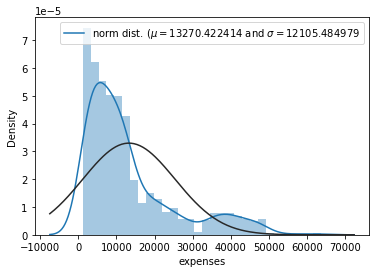

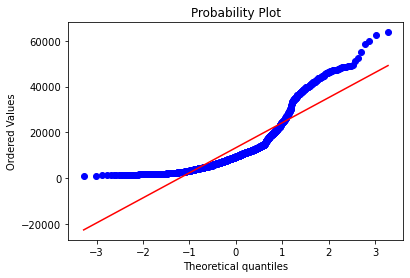

In [248]:
sas.distplot(data['expenses'],fit=norm)

mu,sigma=norm.fit(data['expenses'])
print('the mean is ={:.2f} and the standerd deviation is {:.2f}'.format(mu,sigma))
plt.legend(['norm dist. ($\mu=${:2f} and $\sigma=${:2f}'.format(mu,sigma)],loc='best')
rest=stats.probplot(data['expenses'])

fig=plt.figure()
rest=stats.probplot(data['expenses'],plot=plt)
plt.show()

skweness in colums :  -0.008734062011873602


c:\Users\abrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



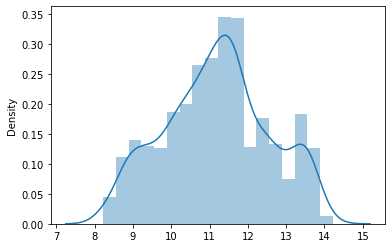

In [252]:
col_cox,lam=stats.boxcox(data['expenses'])[:2]
print('skweness in colums : ',pd.Series(col_cox).skew())
sas.distplot
(col_cox)
plt.show()

In [253]:
data['expenses']=col_cox

In [255]:
x=data.drop('expenses',axis=1)
y=data['expenses']

In [266]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
model=LinearRegression()
rf=RFECV(model,step=1,min_features_to_select=4)
rf.fit(x_train,y_train)

RFECV(estimator=LinearRegression(), min_features_to_select=4)

In [265]:
rf.ranking_

array([1, 1, 1, 1, 1, 1])

> we can see that all feature is important 

In [268]:
sc=StandardScaler()
x=sc.fit_transform(x)


the score of model is :  0.8010489384055193
################
the mean_absolute_error  0.4170608598311387
mean_squared_error : 0.39937247169500384
r2_score: 0.8010489384055193
################
the score of model is :  0.6909235269110691
################
the mean_absolute_error  0.46456753663889105
mean_squared_error : 0.569506693734901
r2_score: 0.6909235269110691
################
the score of model is :  0.8331567899125318
################
the mean_absolute_error  0.3635076807424752
mean_squared_error : 0.3018188514727141
r2_score: 0.8331567899125318
################
the score of model is :  0.7685748354666441
################
the mean_absolute_error  0.3960455521585201
mean_squared_error : 0.43206678567583573
r2_score: 0.7685748354666441
################
the score of model is :  0.7383097155505056
################
the mean_absolute_error  0.4312946487458168
mean_squared_error : 0.47179853568098135
r2_score: 0.7383097155505056
################


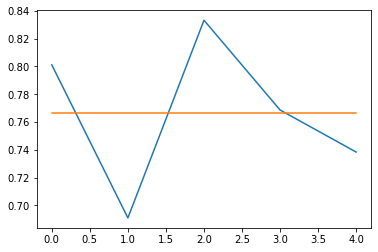

In [273]:
kf=KFold()
model_score=[]
for train_idx,test_idx in kf.split(x):
    xtrain=x[train_idx]
    ytrain=y[train_idx]

    xtest=x[test_idx]
    ytest=y[test_idx]

    model.fit(xtrain,ytrain)
    model_score.append(model.score(xtest,ytest))
    print('the score of model is : ',model.score(xtest,ytest))
    print('################')
    ypred=model.predict(xtest)
    mean_abs=mean_absolute_error(ytest,ypred)
    print('the mean_absolute_error ',mean_abs)
    mean_squ=mean_squared_error(ytest,ypred)
    print('mean_squared_error :',mean_squ)
    r2=r2_score(ytest,ypred)
    print('r2_score:',r2)
    print('################')
plt.plot(model_score)
plt.plot([np.mean(model_score)]*len(model_score))
plt.show()
